In [2]:
from sideinfo import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

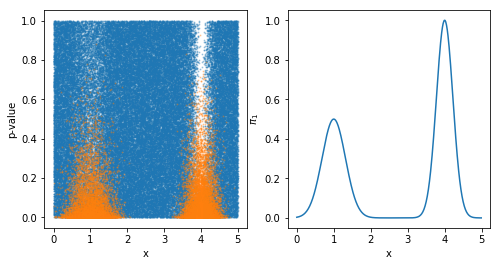

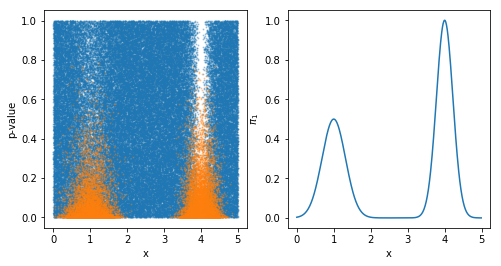

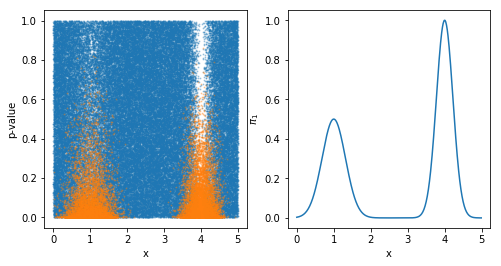

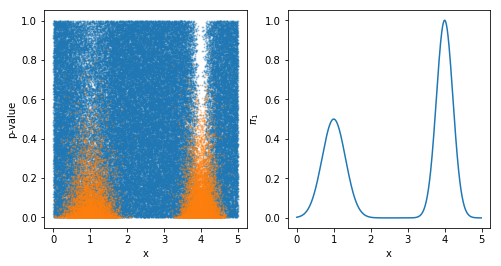

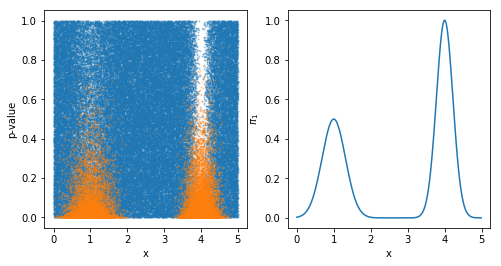

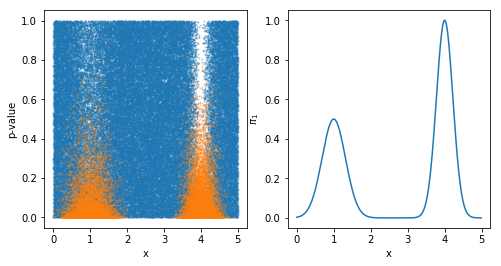

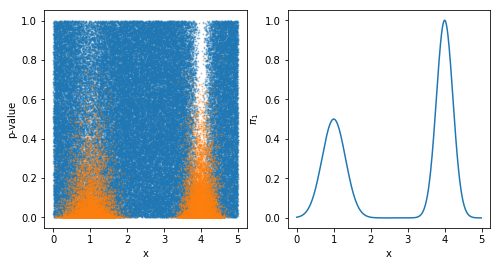

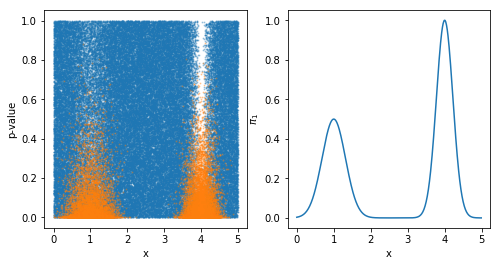

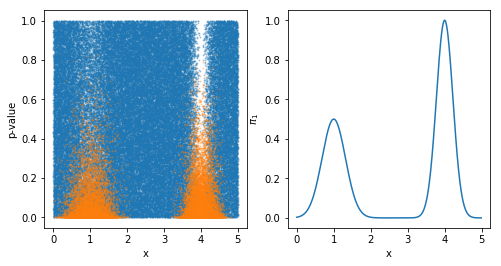

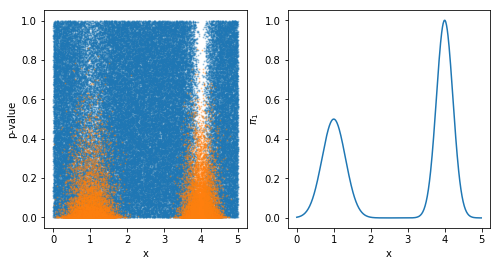

In [3]:
#generate 1d data and plot
for j in range(1,11):
    X = np.random.uniform(high = 5, size = (100000,))
    mu1 = 1
    mu2 = 4
    plt.figure(figsize = (8,4))
    plt.subplot(121)

    #X_dist = np.floor(X * 2)
    #opt = Opt_t_cal_discrete(p, X_dist, num_case = 10, step_size=0.00001)

    pi1 = np.exp(-(X-mu1) ** 2/0.2) * 0.5 + np.exp(-(X-mu2) ** 2 / 0.1)
    plt.xlabel('x')
    plt.ylabel('p-value')
    p, h, x = generate_data_1D_cont(pi1, X)
    plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
    plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)


    plt.subplot(122)


    x2 = np.arange(0,5,0.01)
    y2 = np.exp(-(x2-mu1) ** 2/0.2) * 0.5 + np.exp(-(x2-mu2) ** 2 / 0.1)
    plt.plot(x2,y2)
    plt.xlabel('x')
    plt.ylabel('$\pi_1$')

    plt.savefig('1d7.png')
    
    with open('../data_rep/data_1d_gm.csv.' + str(j), 'w') as f:
        f.write('x_value, p_value, h\n')
        for i in range(len(x)):
            f.write("{}, {}, {}\n".format(x[i],p[i], h[i]))

In [3]:
p_target = opt_threshold(x, p, 10)

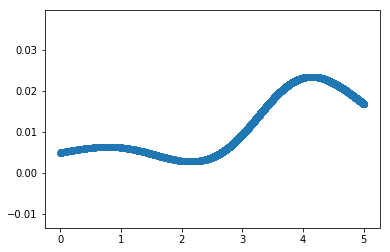

In [4]:
plt.scatter(x, p_target)

In [24]:
network = get_network(num_layers = 10).cuda()
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [25]:
print(BH(p))
print(Storey_BH(p))
#p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, num_it = 3000, cuda=True)

(1128, 0.0028084004197959666)
(1244, 0.0038214691722813386, 0.81225000000000003)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


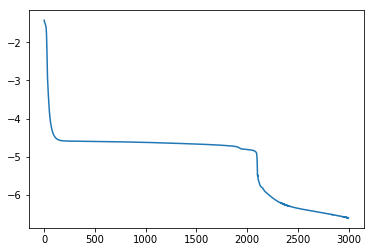

In [26]:
plt.plot(np.log(loss_hist))

In [27]:
optimizer = optim.Adagrad(network.parameters(), lr = 0.01, weight_decay=0.005)
loss_hist, val_hist, s, s2 = train_network_val(network, optimizer, x, p, num_it = 3000, cuda = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


(Variable containing:
1.00000e-02 *
  7.8277
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
1.00000e-03 *
  5.0214
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
1.00000e-02 *
  6.4150
[torch.cuda.FloatTensor of size 1 (GPU 0)]
)


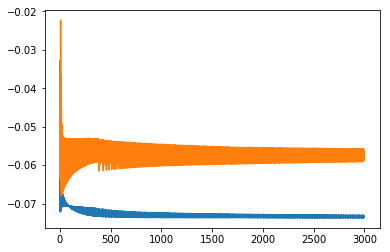

In [28]:
plt.plot(loss_hist)
plt.plot(val_hist)

print(s,s2, s2/s)

In [29]:
network = network.cpu()
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,1)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

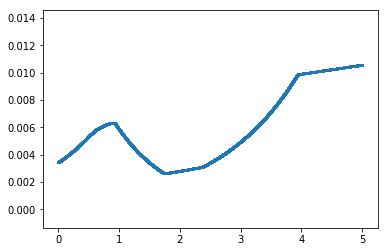

In [30]:
plt.scatter(x, output.data.numpy(), 2)

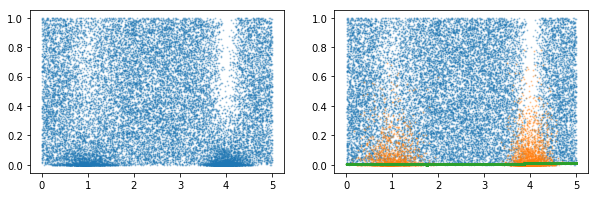

In [31]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.scatter(x, p, 1, alpha = 0.3)
plt.subplot(1,2,2)
plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
plt.subplot(1,2,2)
plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)
plt.scatter(x, output.data.numpy(), 1)

In [32]:
sum(pred)

1551.0

In [423]:
with open('data3.csv', 'w') as f:
    f.write('x_value, p_value, h\n')
    for i in range(len(x)):
        f.write("{}, {}, {}\n".format(x[i],p[i], h[i]))

In [33]:
x2 = np.arange(0, 5, 0.01)
n_samples = len(x2)
x_input = Variable(torch.from_numpy(x2.astype(np.float32).reshape(n_samples ,1)))
output2 = network.forward(x_input)



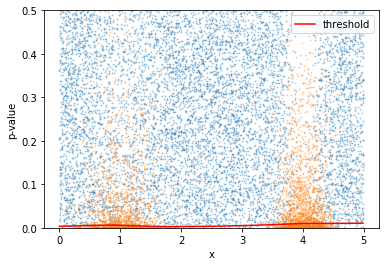

In [34]:
plt.figure()
plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)
plt.plot(x2, output2.data.numpy(), 'r', label = 'threshold')
plt.ylim(0,0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('p-value')
plt.savefig('1d8.png')

In [ ]:
with open('data_1d_gm.csv', 'w') as f:
    f.write('x_value, p_value, h\n')
    for i in range(len(x)):
        f.write("{}, {}, {}\n".format(x[i],p[i], h[i]))